In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('bigdatatrain.csv')

In [3]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [37]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

Finding the null values

In [33]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

checking the categorical attributes

In [31]:
cat_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        cat_col.append(x)
cat_col          

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [32]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

Print the categorical columns

In [36]:
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

Item_Type
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

Outlet_Size
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64



Fill the missing value

In [51]:
item_weight_mean=df.pivot_table(values='Item_Weight',index='Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [55]:
miss_bool=df['Item_Weight'].isna()
miss_bool

0       False
1       False
2       False
3       False
4        True
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Item_Weight, Length: 5681, dtype: bool

In [66]:
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean: 
            df['Item_Weight'][i]=item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i]=0

<ipython-input-66-0ca44e5515bf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Weight'][i]=0


In [67]:
df['Item_Weight'].isna().sum()

0

In [69]:
outlet_size_mode=df.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [71]:
miss_bool=df['Outlet_Size'].isna()
miss_bool

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool

In [78]:
for i, output in enumerate(df['Outlet_Identifier']):
    if miss_bool[i]:
        if output in outlet_size_mode:
            df['Outlet_Size'][i]=output_size_mode.loc[outlet]['Outlet_Size']
        else:
            df['Outlet_Size'][i]=0

<ipython-input-78-0d536f393cfe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Outlet_Size'][i]=0


In [81]:
df['Outlet_Size'].isna().sum()

0

In [84]:
sum(df['Item_Visibility']==0)

353

In [90]:

df.loc[:,'Item_Visibility'].replace([0],[df['Item_Visibility'].mean()],inplace=True)

In [91]:
sum(df['Item_Visibility']==0)

0

EDA

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

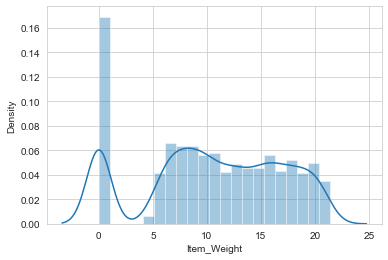

In [92]:
sns.distplot(df['Item_Weight'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

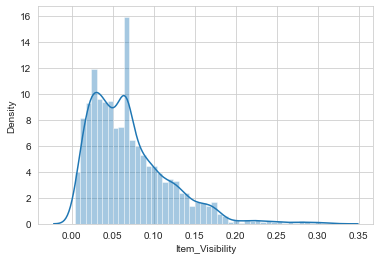

In [93]:
sns.distplot(df['Item_Visibility'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

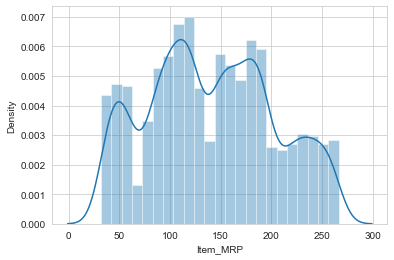

In [94]:
sns.distplot(df['Item_MRP'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

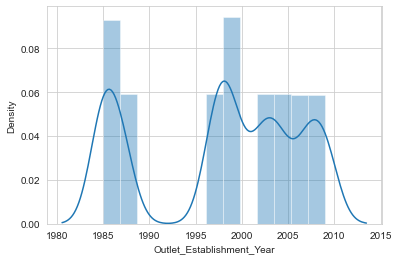

In [95]:
sns.distplot(df['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

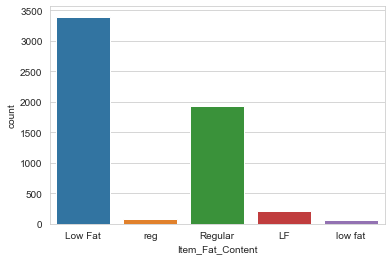

In [96]:
sns.set_style('whitegrid')
sns.countplot(x='Item_Fat_Content',data=df)

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

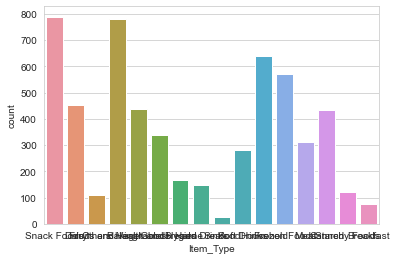

In [97]:
sns.set_style('whitegrid')
sns.countplot(x='Item_Type',data=df)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

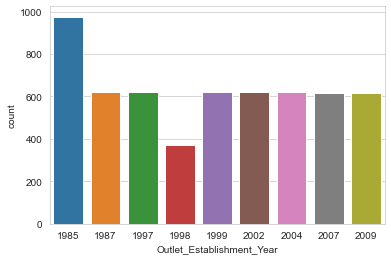

In [99]:
sns.set_style('whitegrid')
sns.countplot(x='Outlet_Establishment_Year',data=df)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

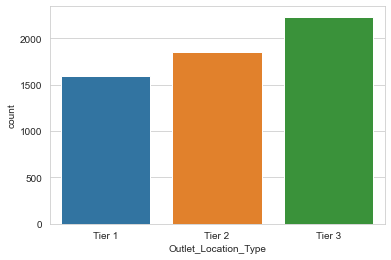

In [100]:
sns.set_style('whitegrid')
sns.countplot(x='Outlet_Location_Type',data=df)

<AxesSubplot:>

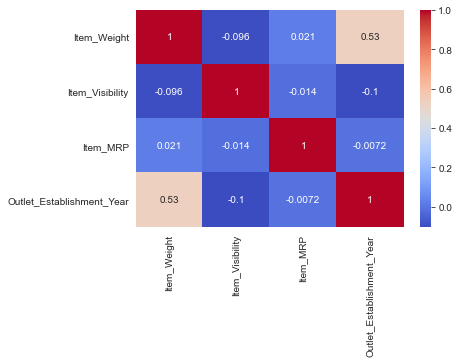

In [107]:
corr=df.corr()
sns.heatmap(corr,annot=True, cmap='coolwarm')

LabelEncoder

In [111]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet
0,FDW58,20.750,1,0.007565,13,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,9
1,FDW14,8.300,4,0.038428,4,87.3198,OUT017,2007,0,Tier 2,Supermarket Type1,2
2,NCN55,14.600,1,0.099575,11,241.7538,OUT010,1998,0,Tier 3,Grocery Store,0
3,FDQ58,7.315,1,0.015388,13,155.0340,OUT017,2007,0,Tier 2,Supermarket Type1,2
4,FDY38,0.000,2,0.118599,4,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,2,0.013496,13,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,8
5677,FDD47,7.600,2,0.142991,15,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,3
5678,NCO17,10.000,1,0.073529,8,118.7440,OUT045,2002,0,Tier 2,Supermarket Type1,7
5679,FDJ26,15.300,2,0.065684,3,214.6218,OUT017,2007,0,Tier 2,Supermarket Type1,2


In [112]:
le=LabelEncoder()
df['Outlet']=le.fit_transform(df['Outlet_Identifier'])
cat_col=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Type']
for col in cat_col:
    df[col]=le.fit_transform(df[col])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']

Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Type all these columns now have the values

Train-test-split

In [127]:
df.drop(columns=['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Location_Type,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,...,Item_Type_14,Item_Type_15,Outlet_Size_0,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750,0.007565,107.8622,Tier 1,9,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,8.300,0.038428,87.3198,Tier 2,2,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,14.600,0.099575,241.7538,Tier 3,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,7.315,0.015388,155.0340,Tier 2,2,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0.000,0.118599,234.2300,Tier 3,5,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500,0.013496,141.3154,Tier 1,8,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
5677,7.600,0.142991,169.1448,Tier 3,3,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
5678,10.000,0.073529,118.7440,Tier 2,7,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5679,15.300,0.065684,214.6218,Tier 2,2,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
